## Importing Required Libraries

In [1]:
## Importing all required libraries

import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import chisquare
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
cd C:\Users\ravit\Desktop\Data Analyst NanoDegree\Project-1

C:\Users\ravit\Desktop\Data Analyst NanoDegree\Project-1


## Loading the data using pandas and exploring for all columns and the length of the dataset

In [4]:
## Loading data file and exploring for length of dataset and total people survived

data = pd.read_csv('titanic-data.csv')
print(data.columns)
print(len(data))
len(data[data['Survived']==0])

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
891


549

### As we can see 549/891 people are dead. So the analysis of the data is to be done to determine the survival stats, the data is to be seen for any NaNs or misinterpretations.

### The three questions I will pose based on the nature of the data

In [5]:
data.head(3) # Displays top 3 of data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### As we can see there are some NaNs in the data. NaNs in each column are calculated in the below cell. 

In [6]:
data.isnull().sum() # Check for missing values in all columns

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### The number of NaNs are high for Age and Cabin. But age is a crucial factor is prediction. Hence, filling Age with 0 is a good option. Also, Cabin is beyond repair and should be ignored for any further analysis as lot of it is already missing

In [8]:
data['Cabin'] = data['Cabin'].fillna(0) # Filling Missing values with 0 

In [7]:
data['Age'] = data['Age'].fillna(0) # Fill NaNs with 0 for ease of identification and not messing up with analysis

### The three questions I pose are:
#### 1. What are the chances od survival if Age > 40
#### 2. What are the chances od survival if Embarked = Q
#### 3. What are the chances od survival if Fare>70

Also, lets explore data before we dive-in to answer these questions

In [9]:
data.groupby('Survived')['Pclass'].describe() # For solving q-1. Grouping by survived and checking Passenger class

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,2.531876,0.735805,1.0,2.0,3.0,3.0,3.0
1,342.0,1.950292,0.863321,1.0,1.0,2.0,3.0,3.0


We can see people survived have lower class value. Therefore, being in lower classes(1&2) increases survival rate

In [10]:
data.groupby('Survived')['Parch'].describe() # For solving q-2. Similar to above cell

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,0.329690,0.823166,0.0,0.0,0.0,0.0,6.0
1,342.0,0.464912,0.771712,0.0,0.0,0.0,1.0,5.0


Also, the parch value is high for people who survived. Hence, having higher parch value increases survival

In [11]:
data.groupby('Survived')['Sex'].describe() # For solving q-3. Similar to above two cells

,count,unique,top,freq
Survived,,,,
0,549,2,male,468
1,342,2,female,233


General Data Exploration tells us that out of 342 survivals, 233 were females... 68.12%

In [13]:
data[data['Age']>40].groupby('Survived')['Age'].describe() # Checking data file for people with Age > 40.

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,95.0,51.378947,8.628169,40.5,45.0,49.0,57.0,74.0
1,55.0,50.527273,7.373261,41.0,45.0,49.0,54.0,80.0


### Question-1 can be answered using the above cell. We can see 55/150 survived who are >40 = 36.67%

In [14]:
data.groupby(by = ('Embarked','Survived')).mean().unstack() # Check data for two categories

PassengerId                Pclass                  Age             \
Survived           0           1         0         1          0          1   
Embarked                                                                     
C         409.853333  473.989247  2.200000  1.634409  22.893333  24.612043   
Q         480.404255  319.966667  2.936170  2.866667  12.904255   6.000000   
S         449.868852  448.857143  2.545667  1.967742  24.969555  26.040323   

             SibSp               Parch                 Fare             
Survived         0         1         0         1          0          1  
Embarked                                                                
C         0.253333  0.494624  0.253333  0.451613  35.443335  79.720926  
Q         0.510638  0.300000  0.276596  0.000000  13.335904  13.182227  
S         0.611241  0.493088  0.348946  0.539171  20.743987  39.547081

### The second question can be answered using this table. As we can see for Q, survival rate = 30/47 = 63.82%

In [15]:
data[data['Fare']>70].groupby('Survived')['Fare'].describe() # Check for two categories with limit on Fare. 

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,29.0,125.228445,64.814918,71.0,77.287500,90.0000,151.55,263.0000
1,76.0,138.046764,93.803637,71.0,81.393725,107.6625,151.55,512.3292


### The third question can be answered using this table. As we can see for Fare>70, survival rate = 76/105 = 72.3%

### The below plots give some histogram plots

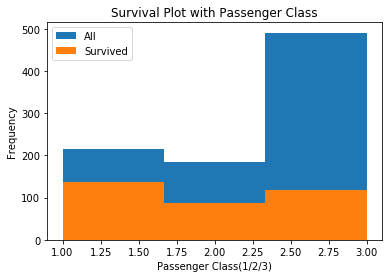

In [16]:
plt.figure()
plt.hist(data['Pclass'],bins=3,label='All')
plt.hist(data[data['Survived']==1]['Pclass'],bins=3,label='Survived')
plt.legend(loc='best')
plt.xlabel('Passenger Class(1/2/3)')
plt.ylabel('Frequency')
plt.title('Survival Plot with Passenger Class')

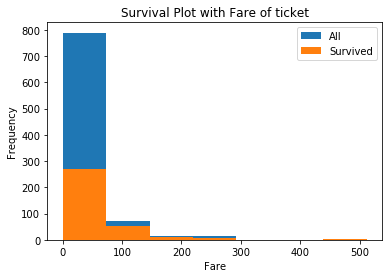

In [17]:
plt.figure()
plt.hist(data['Fare'],bins=7,label='All')
plt.hist(data[data['Survived']==1]['Fare'],bins=7,label='Survived')
plt.legend(loc='best')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Survival Plot with Fare of ticket')

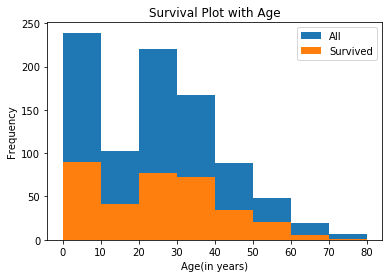

In [18]:
plt.figure()
plt.hist(data['Age'],bins=8,label='All')
plt.hist(data[data['Survived']==1]['Age'],bins=8,label='Survived')
plt.legend(loc='best')
plt.xlabel('Age(in years)')
plt.ylabel('Frequency')
plt.title('Survival Plot with Age')

,mean,std
Survived,,
0,23.653005,17.89615
1,24.034123,17.12672


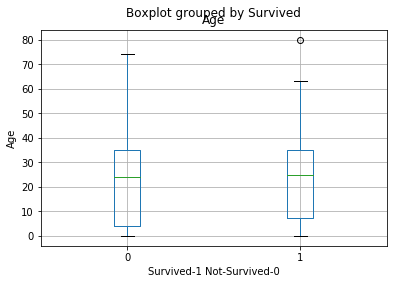

In [23]:
data.boxplot(column=['Age'],by=['Survived'])
plt.xlabel('Survived-1 Not-Survived-0')
plt.ylabel('Age')
pd.DataFrame(data.groupby('Survived')['Age'].describe().loc[:,['mean','std']])

,mean,std
Survived,,
0,22.117887,31.388207
1,48.395408,66.596998


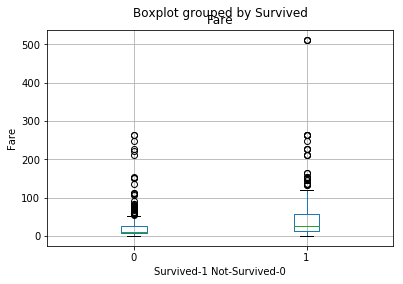

In [24]:
data.boxplot(column=['Fare'],by=['Survived'])
plt.xlabel('Survived-1 Not-Survived-0')
plt.ylabel('Fare')
pd.DataFrame(data.groupby('Survived')['Fare'].describe().loc[:,['mean','std']]) ## Boxplot for more analysis on Survived with Fare

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


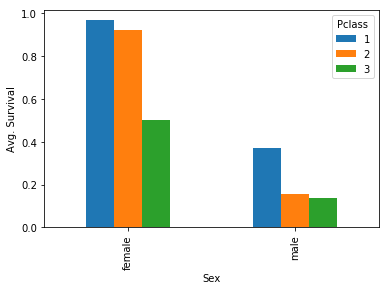

In [25]:
data.groupby(by=['Sex','Pclass'])['Survived'].mean().unstack().plot(kind='bar').set_ylabel('Avg. Survival')
data.groupby(by=['Sex','Pclass'])['Survived'].mean().unstack() ## Bar plot for Analysing two parameters Sex and Passenger class with survived

In [ ]:
chisquare(data[data['Survived']==1]['Age'].fillna(0)) # Chi-square analysis

In [ ]:
chisquare(data[data['Survived']==1]['Fare'].dropna()) # Chi-square analysis

In [ ]:
chisquare(data[data['Survived']==1]['Pclass'].dropna()) # Chi-square analysis

In [26]:
rn = np.linspace(0,80,9)
age_cut = pd.cut(data['Age'],bins=rn)
age_cat = age_cut.cat.add_categories(0).fillna((0))
data['agebin'] = age_cat
data.groupby('agebin').apply(lambda g: (g.loc[g['Survived'] == 1, :].shape[0]/g.shape[0])*100) 
# Obtaining % of people survived in each Age bin

agebin
(0.0, 10.0]     59.375000
(10.0, 20.0]    38.260870
(20.0, 30.0]    36.521739
(30.0, 40.0]    44.516129
(40.0, 50.0]    38.372093
(50.0, 60.0]    40.476190
(60.0, 70.0]    23.529412
(70.0, 80.0]    20.000000
0               29.378531
dtype: float64

#### The above representation is the percentage of people survived in each data bin based on ages. It can be seen that people in group 0-10 had highest survival rate and people in 70-80 had least survival rate

In [27]:
rn = np.linspace(0,515,15)
fare_cut = pd.cut(data['Fare'],bins=rn)
data['farebin'] = fare_cut
data.groupby('farebin').apply(lambda g: ((g.loc[g['Survived'] == 1, :].shape[0]/g.shape[0])*100 if g.shape[0]!=0 \
                                         else (g.loc[g['Survived'] == 1, :].shape[0],g.shape[0])))
# Obtaining % of people survived in each Fare bin

farebin
(0.0, 36.786]         32.4561
(36.786, 73.571]      47.3684
(73.571, 110.357]     77.0833
(110.357, 147.143]         85
(147.143, 183.929]    66.6667
(183.929, 220.714]         75
(220.714, 257.5]      57.1429
(257.5, 294.286]      66.6667
(294.286, 331.071]     (0, 0)
(331.071, 367.857]     (0, 0)
(367.857, 404.643]     (0, 0)
(404.643, 441.429]     (0, 0)
(441.429, 478.214]     (0, 0)
(478.214, 515.0]          100
dtype: object

#### The above representation is the percentage of people survived in each data bin based on fares. It can be seen that people with high fares had higher chances of survival

In [28]:
rn = np.linspace(0,3,4)
class_cut = pd.cut(data['Pclass'],bins=rn)
data['classbin'] = class_cut
data.groupby('classbin').apply(lambda g: (g.loc[g['Survived'] == 1, :].shape[0]/g.shape[0])*100)
# Obtaining % of people survived in each Class bin

classbin
(0.0, 1.0]    62.962963
(1.0, 2.0]    47.282609
(2.0, 3.0]    24.236253
dtype: float64

#### The above representation is the percentage of people survived in each data bin based on Class. It can be seen that people with 1st and 2nd class had higher chances of survival